In [3]:
import pandas as pd
import numpy as np

In [4]:

D2z_dir = 'hw3Data/D2z.txt'
names = ['x1', 'x2', 'y']
df_d2z = pd.read_csv(D2z_dir, sep=" ", names=names)

In [3]:
df_d2z

,x1,x2,y
0,-0.333338,-0.087171,0
1,-1.531730,0.358194,1
2,1.549590,-0.364050,0
3,-1.349910,0.252063,1
4,1.283850,-0.531146,0
...,...,...,...
195,-0.697750,1.098280,1
196,1.161160,-0.733751,0
197,-1.288480,0.443773,1
198,-1.384200,0.526523,1


In [5]:
df_d2z.iloc[:5,:]

,x1,x2,y
0,-0.333338,-0.087171,0
1,-1.531730,0.358194,1
2,1.549590,-0.364050,0
3,-1.349910,0.252063,1
4,1.283850,-0.531146,0


In [5]:
class KNN_Classifier:
    def __init__ (self, k):
        self.k = k

    def fit(self, data: pd.DataFrame):
        self.data = data
        self.data_np = data.to_numpy()
    
    # def _predict_single_df(self, x):
    #     distance = []
    #     for idx, row in self.data.iterrows():
    #         distance_single = np.sqrt(np.sum((x - np.array(row)[:-1])**2))
    #         distance.append(distance_single)
    #     distance = np.array(distance)
    #     distance_arg = np.argpartition(distance, self.k)
    #     temp_data = self.data.iloc[distance_arg[:self.k]]
    #     label = 1 if temp_data.iloc[:, -1].sum()/len(temp_data) > 0.5 else 0
    #     return label
    
    def _predict_np(self, X, prob = False):
        result = []
        for x in X:
            distance = []
            for row in self.data_np:
                distance_single = np.sum((x - np.array(row)[:-1])**2)
                distance.append(distance_single)
            distance = np.array(distance)
            distance_arg = np.argpartition(distance, self.k)
            temp_data = self.data_np[distance_arg[:self.k]]
            if(prob):
                label = np.sum(temp_data[:, -1])/len(temp_data)
            else:
                label = 1 if np.sum(temp_data[:, -1])/len(temp_data) > 0.5 else 0
            result.append(label)
        return np.array(result)

    def predict(self, X):
        return self._predict_np(X)
    
    def predict_prob(self, X):
        return self._predict_np(X, prob=True)

    
    def set_k(self, k):
        self.k = k

In [6]:
my_KNN = KNN_Classifier(1)
my_KNN.fit(df_d2z)
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.linspace(x_min,x_max, 41),
np.linspace(y_min, y_max, 41))
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = my_KNN.predict(x_in)


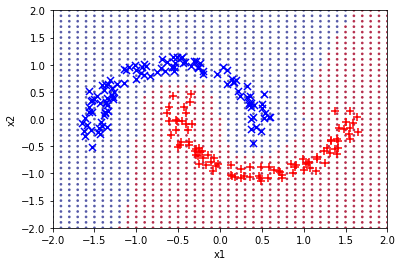

In [52]:
import matplotlib.pyplot as plt
y_pred = y_pred.reshape(xx.shape)
plt.scatter(x_in[:,0], x_in[:, 1] , c = y_pred, s=3, cmap=plt.cm.RdYlBu, alpha=0.7 )
plt.scatter(df_d2z['x1'][df_d2z['y']==0], df_d2z['x2'][df_d2z['y']==0] , c = 'r', s=50, cmap=plt.cm.RdYlBu, alpha=1,marker="+" )
plt.scatter(df_d2z['x1'][df_d2z['y']==1], df_d2z['x2'][df_d2z['y']==1] , c = 'b', s=50, cmap=plt.cm.RdYlBu, alpha=1,marker="x" )
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig("hw3Plot/Decision_boundary_K1.pdf")

In [7]:
pd_email = pd.read_csv('hw3Data\emails.csv', index_col='Email No.')

In [9]:
pd_email.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
Email 3,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
Email 4,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
Email 5,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [10]:
pd_email.to_numpy()

array([[ 0,  0,  1, ...,  0,  0,  0],
       [ 8, 13, 24, ...,  1,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 6,  8,  1, ...,  0,  0,  0],
       [ 8,  6,  2, ...,  0,  0,  0],
       [13, 12,  3, ...,  0,  0,  0]], dtype=int64)

In [11]:
a = np.array([1,2])
b = np.array([3])
a=b
a

array([3])

In [8]:
def n_fold_validation(dataset:pd.DataFrame, classifier, n):
    total_len = len(dataset)
    each_len = total_len/n
    n_fold_index = []
    score = {"Accuracy":[], "Precision":[], "Recall":[]}
    for i in range(n):
        n_fold_index.append(np.arange(i*each_len, (i+1)*each_len).astype(int))
    for i in range(n):
        test_set = dataset.iloc[n_fold_index[i]]
        train_index = []
        for j in range(n):
            if j != i:
                train_index = np.hstack((train_index, n_fold_index[j]))
        train_set = dataset.iloc[train_index]
        classifier.fit(train_set)
        result = classifier.predict(test_set.iloc[:,:-1].to_numpy())
        #result = np.random.randint(2,size = 1000)
        truth = test_set.iloc[:, -1].to_numpy()
        TP = np.sum(truth[truth==1]==result[truth==1])
        TN = np.sum(truth[truth==0]==result[truth==0])
        FP = np.sum(result==1) - TP
        FN = np.sum(result==0) - TN
        print("Accuracy: %f, Precision: %f, Recall: %f"%((TP+TN)/each_len, (TP)/(TP+FP), (TP)/(TP+FN)))
        print("TP = %d, TN = %d, FP = %d, FN = %d"%(TP, TN, FP, FN))
        score['Accuracy'].append((TP+TN)/each_len)
        score['Precision'].append((TP)/(TP+FP))
        score['Recall'].append((TP)/(TP+FN))
    return score



In [ ]:
my_KNN = KNN_Classifier(1)
five_fold_result_1NN = n_fold_validation(pd_email, my_KNN, 5)
'''
Accuracy: 0.825000, Precision: 0.654494, Recall: 0.817544
Accuracy: 0.853000, Precision: 0.685714, Recall: 0.866426
Accuracy: 0.862000, Precision: 0.721212, Recall: 0.838028
Accuracy: 0.851000, Precision: 0.716418, Recall: 0.816327
Accuracy: 0.775000, Precision: 0.605744, Recall: 0.758170
'''

In [14]:
class Logistic_gradient:
    def __init__(self) :
        self.theta = None
    
    def fit(self, data:pd.DataFrame):
        X = data.iloc[:,:-1].to_numpy()
        Y = data.iloc[:, -1].to_numpy().reshape(-1,1)
        self._fit_XY(X, Y)
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def _fit_XY(self, X, Y):
        self.theta = np.zeros(X.shape[1])
        epoch = 30
        lr = 0.0012
        for i in range(epoch):
            for j in range(X.shape[0]):
                #gradient descent
                self.theta = self.theta - lr*X[j]*(self.sigmoid(np.dot(self.theta, X[j]))-Y[j])
    
    def predict(self, X):
        threshold = 0.5
        pred_prob = self.sigmoid(np.matmul(X, self.theta.T))
        prediction = np.zeros(pred_prob.shape)
        prediction[pred_prob>threshold] = 1
        return prediction
    
    def predict_prob(self, X):
        pred_prob = self.sigmoid(np.matmul(X, self.theta.T))
        return pred_prob


In [15]:
my_logistic = Logistic_gradient()
five_fold_result_1NN = n_fold_validation(pd_email, my_logistic, 5)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_23584/3058811734.py:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Accuracy: 0.932000, Precision: 0.928854, Recall: 0.824561
TP = 235, TN = 697, FP = 18, FN = 50
Accuracy: 0.930000, Precision: 0.919028, Recall: 0.819495
TP = 227, TN = 703, FP = 20, FN = 50
Accuracy: 0.924000, Precision: 0.936975, Recall: 0.785211
TP = 223, TN = 701, FP = 15, FN = 61
Accuracy: 0.912000, Precision: 0.925620, Recall: 0.761905
TP = 224, TN = 688, FP = 18, FN = 70
Accuracy: 0.900000, Precision: 0.855172, Recall: 0.810458
TP = 248, TN = 652, FP = 42, FN = 58


In [ ]:
ks = [1,3,5,7,10]
results = []
for i in ks:
    my_KNN = KNN_Classifier(i)
    print(i)
    five_fold_result = n_fold_validation(pd_email, my_KNN, 5)
    results.append(five_fold_result)

In [ ]:
'''
1
Accuracy: 0.825000, Precision: 0.654494, Recall: 0.817544
Accuracy: 0.853000, Precision: 0.685714, Recall: 0.866426
Accuracy: 0.862000, Precision: 0.721212, Recall: 0.838028
Accuracy: 0.851000, Precision: 0.716418, Recall: 0.816327
Accuracy: 0.775000, Precision: 0.605744, Recall: 0.758170
3
Accuracy: 0.845000, Precision: 0.677596, Recall: 0.870175
Accuracy: 0.850000, Precision: 0.695385, Recall: 0.815884
Accuracy: 0.859000, Precision: 0.724138, Recall: 0.813380
Accuracy: 0.879000, Precision: 0.776358, Recall: 0.826531
Accuracy: 0.775000, Precision: 0.609756, Recall: 0.735294
5
Accuracy: 0.837000, Precision: 0.668508, Recall: 0.849123
Accuracy: 0.850000, Precision: 0.706840, Recall: 0.783394
Accuracy: 0.869000, Precision: 0.747573, Recall: 0.813380
Accuracy: 0.869000, Precision: 0.762058, Recall: 0.806122
Accuracy: 0.779000, Precision: 0.613941, Recall: 0.748366
7
Accuracy: 0.839000, Precision: 0.671271, Recall: 0.852632
Accuracy: 0.864000, Precision: 0.725240, Recall: 0.819495
Accuracy: 0.875000, Precision: 0.755627, Recall: 0.827465
Accuracy: 0.874000, Precision: 0.778146, Recall: 0.799320
Accuracy: 0.779000, Precision: 0.614555, Recall: 0.745098
10
Accuracy: 0.862000, Precision: 0.731861, Recall: 0.814035
Accuracy: 0.869000, Precision: 0.750000, Recall: 0.790614
Accuracy: 0.878000, Precision: 0.785211, Recall: 0.785211
Accuracy: 0.887000, Precision: 0.826715, Recall: 0.778912
Accuracy: 0.782000, Precision: 0.631737, Recall: 0.689542
'''

In [113]:
import pickle

# Read dictionary pkl file
with open('hw3Data/results.pkl', 'wb') as fp:
    pickle.dump(results, fp)


In [9]:
import pickle

# Read dictionary pkl file
with open('hw3Data/results.pkl', 'rb') as fp:
    loaded_result = pickle.load(fp)


In [12]:
Accuracy_list = []
for i in loaded_result:
    Accuracy_list.append(np.array(i['Accuracy']).mean())

In [13]:
Accuracy_list

[0.8332, 0.8416, 0.8408, 0.8462, 0.8556000000000001]

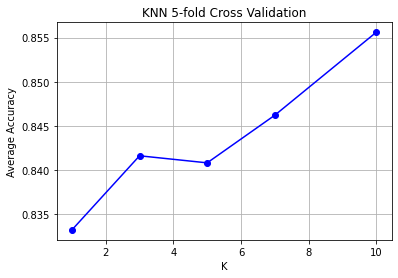

In [22]:
import matplotlib.pyplot as plt

# Sample list of data points
  # Replace this list with your data points

# Create a line plot
plt.plot([1,3,5,7,10], Accuracy_list, marker='o', color='b', label='Data Points', linestyle='-')

# Add labels and title
plt.xlabel('K')
plt.ylabel('Average Accuracy')
plt.title('KNN 5-fold Cross Validation')

# Display legend
plt.grid()
# Display the plot
plt.savefig('hw3Plot/Knn_5-fold_validation.pdf')
plt.show()

In [17]:

def pred_prob_one_split(dataset:pd.DataFrame, classifier, n, split_i = 1):
    total_len = len(dataset)
    each_len = total_len/n
    n_fold_index = []
    score = {"Accuracy":[], "Precision":[], "Recall":[]}
    for i in range(n):
        n_fold_index.append(np.arange(i*each_len, (i+1)*each_len).astype(int))
    test_set = dataset.iloc[n_fold_index[i]]
    train_index = []
    for j in range(n):
        if j != split_i:
            train_index = np.hstack((train_index, n_fold_index[j]))
    train_set = dataset.iloc[train_index]
    classifier.fit(train_set)
    result_prob = classifier.predict_prob(test_set.iloc[:,:-1].to_numpy())
    #result = np.random.randint(2,size = 1000)
    truth = test_set.iloc[:, -1].to_numpy()
    # TP = np.sum(truth[truth==1]==result[truth==1])
    # TN = np.sum(truth[truth==0]==result[truth==0])
    # FP = np.sum(result==1) - TP
    # FN = np.sum(result==0) - TN
    # print("Accuracy: %f, Precision: %f, Recall: %f"%((TP+TN)/each_len, (TP)/(TP+FP), (TP)/(TP+FN)))
    # print("TP = %d, TN = %d, FP = %d, FN = %d"%(TP, TN, FP, FN))
    # score['Accuracy'].append((TP+TN)/each_len)
    # score['Precision'].append((TP)/(TP+FP))
    # score['Recall'].append((TP)/(TP+FN))
    return result_prob, truth

In [18]:
knn_roc = KNN_Classifier(5)
logistic_roc = Logistic_gradient()
prob_logistic, truth_logistic = pred_prob_one_split(pd_email, logistic_roc, 5, 0)
prob_knn, truth_knn = pred_prob_one_split(pd_email, knn_roc, 5, 0)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_23584/3058811734.py:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


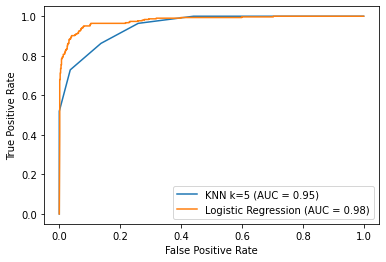

In [35]:
import matplotlib.pyplot as plt  # doctest: +SKIP
import numpy as np
from sklearn import metrics
# y = np.array([0, 0, 1, 1])
# pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr_l, tpr_l, thresholds_l = metrics.roc_curve(truth_logistic, prob_logistic)
for i in range(len(prob_knn)):
     if prob_knn[i]==0.99:
         prob_knn[i] = 1
fpr_k, tpr_k, thresholds_k = metrics.roc_curve(truth_knn, prob_knn)
roc_auc_l = metrics.auc(fpr_l, tpr_l)
roc_auc_k = metrics.auc(fpr_k, tpr_k)
display_1 = metrics.RocCurveDisplay(fpr=fpr_k , tpr=tpr_k , roc_auc=roc_auc_k ,estimator_name='KNN k=5')
display_2 = metrics.RocCurveDisplay(fpr=fpr_l, tpr=tpr_l, roc_auc=roc_auc_l,estimator_name='Logistic Regression')
ax1 = display_1.plot()  # doctest: +SKIP
ax2 = display_2.plot(ax=display_1.ax_)  # doctest: +SKIP
plt.savefig('RocQ2.pdf')

In [34]:
thresholds_l

array([2.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 9.99869825e-001, 9.99860888e-001, 9.98601426e-001,
       9.98525486e-001, 9.93817886e-001, 9.93804620e-001, 9.91179395e-001,
       9.86538420e-001, 9.69259260e-001, 9.48583337e-001, 9.38668495e-001,
       9.29905788e-001, 9.07639928e-001, 8.80236714e-001, 8.55294253e-001,
       8.39248584e-001, 8.20381890e-001, 7.30389451e-001, 6.15831147e-001,
       3.75989828e-001, 2.96354246e-001, 2.49472406e-001, 2.25862752e-001,
       2.11807863e-001, 1.97445687e-001, 1.71678947e-001, 1.44862883e-001,
       8.31750030e-002, 6.60876345e-002, 6.13228311e-002, 6.08138807e-002,
       5.18249706e-002, 3.53521454e-002, 3.22564892e-002, 1.82632310e-002,
       1.54722341e-002, 1.34127532e-002, 6.08926155e-003, 4.94468223e-003,
       4.80249258e-003, 2.58339240e-003, 2.11231407e-003, 1.71160633e-003,
       1.25373041e-003, 1.23120387e-003, 1.15089745e-003, 1.01609834e-003,
       8.28033951e-004, 8

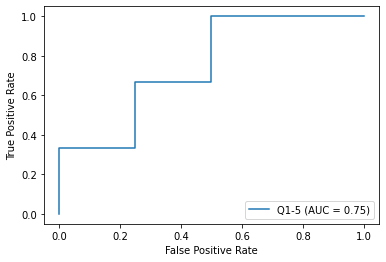

In [68]:
q1_5_confidence = [0.95,0.85,0.8,0.7,0.55,0.45,0.4,0.3,0.2,0.1]
q1_5_truth = [1,1,0,1,1,0,1,1,0,0]
fpr, tpr, thresholds = metrics.roc_curve(q1_5_truth, q1_5_confidence)
roc_auc = metrics.auc(fpr, tpr)
display_3 = metrics.RocCurveDisplay(fpr=fpr , tpr=tpr, roc_auc=roc_auc ,estimator_name='Q1-5')
display_3.plot()
plt.savefig('hw3Plot/q1-5.pdf')

In [67]:
thresholds

array([1.95, 0.95, 0.85, 0.8 , 0.55, 0.45, 0.3 , 0.1 ])